In [17]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
# Generate random data for demonstration purposes
rawdata = pd.read_csv("E:\OneDrive - Institut Teknologi Sepuluh Nopember\data.csv", sep=';')
data = np.array(rawdata.values)

In [20]:
def SOM(input_data, max_iter, learning_rate):
    centroids = np.array([np.mean(input_data, axis=0), np.median(input_data, axis=0), np.max(input_data, axis=0)])
    K = centroids.shape[0]
    n = 1
    iterasi = 0
    closest_centroid = []
    for i in range(max_iter):
        print(f"\nIterasi ke {i+1} / {max_iter}")
        iterasi += 1
        for j in range(input_data.shape[0]):
            n += 1
            distances = np.linalg.norm(input_data[j] - centroids, axis=1, ord=2)
            closest_centroids_idx = np.argmin(distances)
            prev_centroids = centroids.copy()
            if i == max_iter-1:
                closest_centroid.append((closest_centroids_idx)+1)
            for k in range(K):
                if k == closest_centroids_idx:
                    centroids[k] += learning_rate * (input_data[j] - centroids[k])
                    dist_change = np.linalg.norm(centroids[k] - prev_centroids[k], ord=2)
        learning_rate = learning_rate * 0.5
        print(f"Koordinat akhir W1, W2, dan W3 setelah iterasi ke-{iterasi}:")
        print(centroids)
    return centroids, closest_centroid

In [21]:
results, final_clusters = SOM(data, 100, 0.5)


Iterasi ke 1 / 100
Koordinat akhir W1, W2, dan W3 setelah iterasi ke-1:
[[-0.07163115 -0.03330184  0.01409389]
 [ 0.00387211  0.00794528  0.00172686]
 [ 0.06347274  0.02132923 -0.00915298]]

Iterasi ke 2 / 100
Koordinat akhir W1, W2, dan W3 setelah iterasi ke-2:
[[-0.08194882 -0.04423565  0.01363386]
 [-0.00048441  0.00148791  0.00500381]
 [ 0.03629639  0.01345764 -0.01114841]]

Iterasi ke 3 / 100
Koordinat akhir W1, W2, dan W3 setelah iterasi ke-3:
[[-0.09482585 -0.05555969  0.01632009]
 [-0.00622949 -0.00101876  0.00468699]
 [ 0.0340278   0.01005374 -0.00533259]]

Iterasi ke 4 / 100
Koordinat akhir W1, W2, dan W3 setelah iterasi ke-4:
[[-0.09867166 -0.05922888  0.01736723]
 [-0.00638578 -0.00154402  0.00334433]
 [ 0.03946651  0.01107809 -0.00398198]]

Iterasi ke 5 / 100
Koordinat akhir W1, W2, dan W3 setelah iterasi ke-5:
[[-0.09974199 -0.06035339  0.01776293]
 [-0.00748524 -0.00185618  0.00242281]
 [ 0.04006992  0.01245147 -0.00354367]]

Iterasi ke 6 / 100
Koordinat akhir W1, W2, d

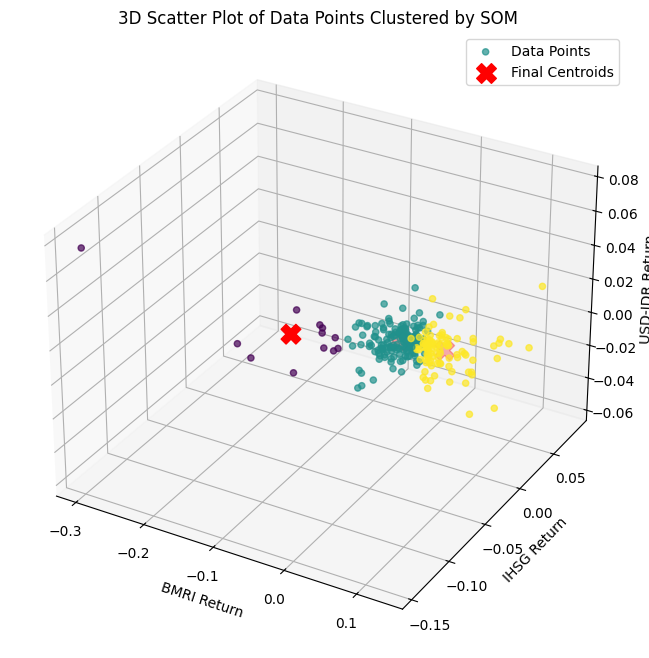

In [22]:
def plot_som_clusters(data, centroids, final_clusters):
    # Scatter plot in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot data points colored by their cluster assignments during the final iteration
    scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=final_clusters, cmap='viridis', marker='o', alpha=0.7, label='Data Points')

    # Plot centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label='Final Centroids')

    ax.set_title('3D Scatter Plot of Data Points Clustered by SOM')
    ax.set_xlabel('BMRI Return')
    ax.set_ylabel('IHSG Return')
    ax.set_zlabel('USD-IDR Return')
    ax.legend()

    plt.show()

plot_som_clusters(data, results, final_clusters)

In [23]:
final_clusters = np.array(final_clusters).reshape(-1, 1)
clustered_data = np.concatenate([data, final_clusters], axis=1)
clustered_data = pd.DataFrame(clustered_data, columns=['BMRI', 'IHSG', 'USD-IDR', 'Cluster'])
mean_data = np.array(clustered_data.groupby('Cluster').mean())

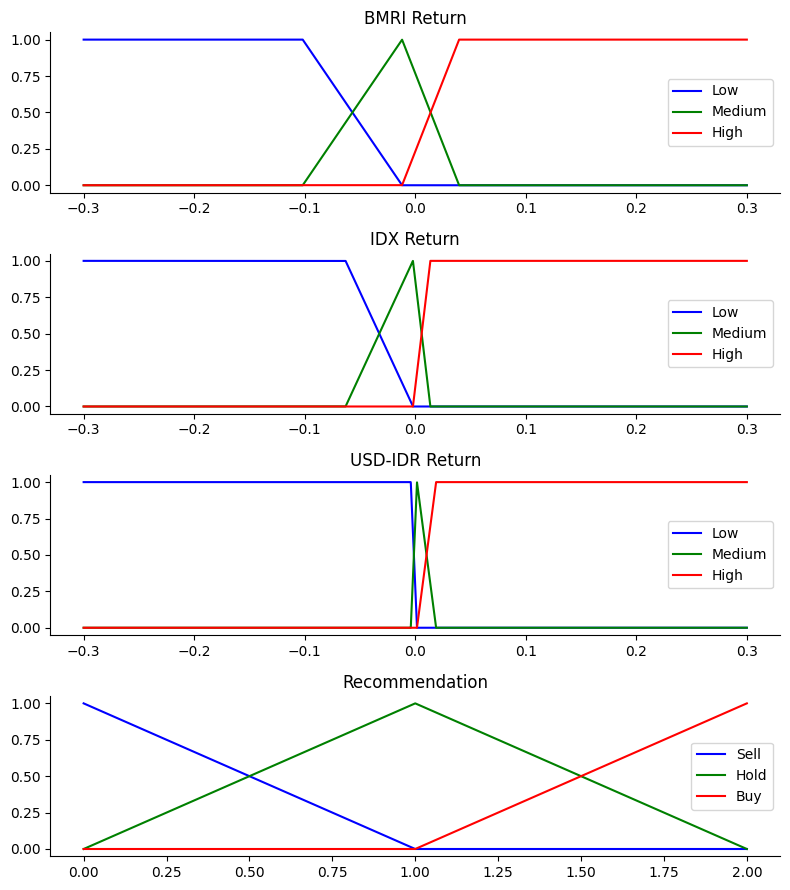

In [24]:
x_bmri = np.arange(-0.3, 0.3001, 0.0001)
x_idx = np.arange(-0.3, 0.3001, 0.0001)
x_usdidr = np.arange(-0.3, 0.3001, 0.0001)
y_rec = np.arange(0, 3, 1)

bmri_lo = fuzz.trapmf(x_bmri, [-1, -1, mean_data[0][0], mean_data[1][0]])
bmri_md = fuzz.trimf(x_bmri, [mean_data[0][0], mean_data[1][0], mean_data[2][0]])
bmri_hi = fuzz.trapmf(x_bmri, [mean_data[1][0], mean_data[2][0], 1, 1])

idx_lo = fuzz.trapmf(x_idx, [-1, -1, mean_data[0][1], mean_data[1][1]])
idx_md = fuzz.trimf(x_idx, [mean_data[0][1], mean_data[1][1], mean_data[2][1]])
idx_hi = fuzz.trapmf(x_idx, [mean_data[1][1], mean_data[2][1], 1, 1])

usdidr_lo = fuzz.trapmf(x_usdidr, [-1, -1, mean_data[2][2], mean_data[1][2]])
usdidr_md = fuzz.trimf(x_usdidr, [mean_data[2][2], mean_data[1][2], mean_data[0][2]])
usdidr_hi = fuzz.trapmf(x_usdidr, [mean_data[1][2], mean_data[0][2], 1, 1])

rec_sell = fuzz.trimf(y_rec, [0, 0, 1])
rec_hold = fuzz.trimf(y_rec, [0, 1, 2])
rec_buy = fuzz.trimf(y_rec, [1, 2, 2])

# Visualize these universes and membership functions
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 9))

ax0.plot(x_bmri, bmri_lo, 'b', linewidth=1.5, label='Low')
ax0.plot(x_bmri, bmri_md, 'g', linewidth=1.5, label='Medium')
ax0.plot(x_bmri, bmri_hi, 'r', linewidth=1.5, label='High')
ax0.set_title('BMRI Return')
ax0.legend()

ax1.plot(x_idx, idx_lo, 'b', linewidth=1.5, label='Low')
ax1.plot(x_idx, idx_md, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_idx, idx_hi, 'r', linewidth=1.5, label='High')
ax1.set_title('IDX Return')
ax1.legend()

ax2.plot(x_usdidr, usdidr_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_usdidr, usdidr_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_usdidr, usdidr_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('USD-IDR Return')
ax2.legend()

ax3.plot(y_rec, rec_sell, 'b', linewidth=1.5, label='Sell')
ax3.plot(y_rec, rec_hold, 'g', linewidth=1.5, label='Hold')
ax3.plot(y_rec, rec_buy, 'r', linewidth=1.5, label='Buy')
ax3.set_title('Recommendation')
ax3.legend()

# Turn off top/right axes
for ax in (ax0, ax1, ax2, ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Tsukamoto Output: 0.9647989668224105
Recommendation: Hold


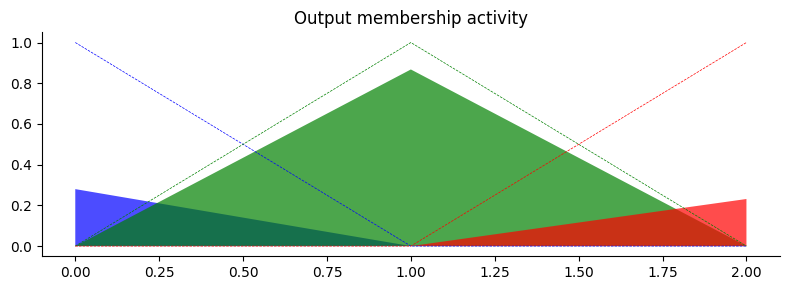

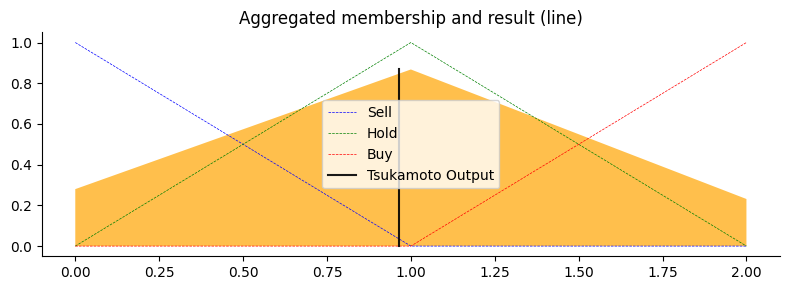

In [25]:
    bmri_input = 0
    idx_input = 0
    usdidr_input = 0

    bmri_return_lo = fuzz.interp_membership(x_bmri, bmri_lo, bmri_input)
    bmri_return_md = fuzz.interp_membership(x_bmri, bmri_md, bmri_input)
    bmri_return_hi = fuzz.interp_membership(x_bmri, bmri_hi, bmri_input)

    idx_return_lo = fuzz.interp_membership(x_idx, idx_lo, idx_input)
    idx_return_md = fuzz.interp_membership(x_idx, idx_md, idx_input)
    idx_return_hi = fuzz.interp_membership(x_idx, idx_hi, idx_input)

    usdidr_return_lo = fuzz.interp_membership(x_usdidr, usdidr_lo, usdidr_input)
    usdidr_return_md = fuzz.interp_membership(x_usdidr, usdidr_md, usdidr_input)
    usdidr_return_hi = fuzz.interp_membership(x_usdidr, usdidr_hi, usdidr_input)

    active_rule1 = max(bmri_return_lo, idx_return_lo, usdidr_return_lo)
    rec_activation_sell = np.fmin(active_rule1, rec_sell)

    active_rule2 = max(bmri_return_md, idx_return_md, usdidr_return_md)
    rec_activation_hold = np.fmin(active_rule2, rec_hold)

    active_rule3 = max(bmri_return_hi, idx_return_hi, usdidr_return_hi)
    rec_activation_buy = np.fmin(active_rule3, rec_buy)

    rec0 = np.zeros_like(y_rec)

    # Visualize this
    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.fill_between(y_rec, rec0, rec_activation_sell, facecolor='b', alpha=0.7)
    ax0.plot(y_rec, rec_sell, 'b', linewidth=0.5, linestyle='--', )
    ax0.fill_between(y_rec, rec0, rec_activation_hold, facecolor='g', alpha=0.7)
    ax0.plot(y_rec, rec_hold, 'g', linewidth=0.5, linestyle='--')
    ax0.fill_between(y_rec, rec0, rec_activation_buy, facecolor='r', alpha=0.7)
    ax0.plot(y_rec, rec_buy, 'r', linewidth=0.5, linestyle='--')
    ax0.set_title('Output membership activity')

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()

    aggregated = np.fmax(rec_activation_sell,
                        np.fmax(rec_activation_hold, rec_activation_buy))

    # Tsukamoto defuzzification
    numerator = np.sum(y_rec * aggregated)
    denominator = np.sum(aggregated)
    tsukamoto_output = numerator / denominator
    fuzzy_cluster = []
    #Visualisasi Hasil Defuzzification Tsukamoto
    print("Tsukamoto Output:", tsukamoto_output)
    # Determine the recommendation based on Tsukamoto output
    if tsukamoto_output < 0.5:
        recommendation = 'Sell'
        fuzzy_cluster.append(1)
    elif tsukamoto_output >= 0.5 and tsukamoto_output < 1.5:
        recommendation = 'Hold'
        fuzzy_cluster.append(2)
    else:
        recommendation = 'Buy'
        fuzzy_cluster.append(3)

    print("Recommendation:", recommendation)

    fig, ax0 = plt.subplots(figsize=(8, 3))

    ax0.plot(y_rec, rec_sell, 'b', linewidth=0.5, linestyle='--', label='Sell')
    ax0.plot(y_rec, rec_hold, 'g', linewidth=0.5, linestyle='--', label='Hold')
    ax0.plot(y_rec, rec_buy, 'r', linewidth=0.5, linestyle='--', label='Buy')
    ax0.fill_between(y_rec, rec0, aggregated, facecolor='Orange', alpha=0.7)
    ax0.plot([tsukamoto_output, tsukamoto_output], [0, np.max(aggregated)], 'k', linewidth=1.5, alpha=0.9, label='Tsukamoto Output')
    ax0.legend()
    ax0.set_title('Aggregated membership and result (line)')

    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    plt.show()

In [26]:
def fuzzy_defuzzy(return_bmri, return_ihsg, return_usdidr):
    bmri_input = return_bmri
    idx_input = return_ihsg
    usdidr_input = return_usdidr

    bmri_return_lo = fuzz.interp_membership(x_bmri, bmri_lo, bmri_input)
    bmri_return_md = fuzz.interp_membership(x_bmri, bmri_md, bmri_input)
    bmri_return_hi = fuzz.interp_membership(x_bmri, bmri_hi, bmri_input)

    idx_return_lo = fuzz.interp_membership(x_idx, idx_lo, idx_input)
    idx_return_md = fuzz.interp_membership(x_idx, idx_md, idx_input)
    idx_return_hi = fuzz.interp_membership(x_idx, idx_hi, idx_input)

    usdidr_return_lo = fuzz.interp_membership(x_usdidr, usdidr_lo, usdidr_input)
    usdidr_return_md = fuzz.interp_membership(x_usdidr, usdidr_md, usdidr_input)
    usdidr_return_hi = fuzz.interp_membership(x_usdidr, usdidr_hi, usdidr_input)

    active_rule1 = max(bmri_return_lo, idx_return_lo, usdidr_return_lo)
    rec_activation_sell = np.fmin(active_rule1, rec_sell)

    active_rule2 = max(bmri_return_md, idx_return_md, usdidr_return_md)
    rec_activation_hold = np.fmin(active_rule2, rec_hold)

    active_rule3 = max(bmri_return_hi, idx_return_hi, usdidr_return_hi)
    rec_activation_buy = np.fmin(active_rule3, rec_buy)

    rec0 = np.zeros_like(y_rec)

    aggregated = np.fmax(rec_activation_sell,
                        np.fmax(rec_activation_hold, rec_activation_buy))

    # Tsukamoto defuzzification
    numerator = np.sum(y_rec * aggregated)
    denominator = np.sum(aggregated)
    tsukamoto_output = numerator / denominator

    return tsukamoto_output

In [27]:
fuzzy_results = []
for i in range(data.shape[0]):
    fuzzy_results.append(fuzzy_defuzzy(data[i,0], data[i,1], data[i,2]))
array_fuzzy = np.array(fuzzy_results).reshape(-1, 1)

def SOM_1D(input_data, max_iter, learning_rate):
    num_features = input_data.shape[1]
    # Initialize centroids based on data range
    centroids = np.array([np.mean(input_data), np.median(input_data), np.max(input_data)]).reshape((3, num_features))
    
    K = centroids.shape[0]
    n = 1
    iterasi = 0
    closest_centroid = []

    for i in range(max_iter):
        print(f"\nIterasi ke {i+1} / {max_iter}")
        iterasi += 1
        
        for j in range(input_data.shape[0]):
            n += 1
            distances = np.linalg.norm(input_data[j] - centroids, axis=1, ord=2)
            closest_centroids_idx = np.argmin(distances)
            prev_centroids = centroids.copy()
            
            if i == max_iter-1:
                closest_centroid.append((closest_centroids_idx) + 1)
            
            for k in range(K):
                if k == closest_centroids_idx:
                    centroids[k] += learning_rate * (input_data[j] - centroids[k])
                    dist_change = np.linalg.norm(centroids[k] - prev_centroids[k], ord=2)
        
        learning_rate = learning_rate * 0.5
        print(f"Koordinat akhir centroids setelah iterasi ke-{iterasi}:")
        print(centroids)
    
    return centroids, closest_centroid

# Example usage for 1D data
results_1d, final_clusters_1d = SOM_1D(array_fuzzy, max_iter=50, learning_rate=0.5)



Iterasi ke 1 / 50
Koordinat akhir centroids setelah iterasi ke-1:
[[0.95337532]
 [0.66368759]
 [1.37803815]]

Iterasi ke 2 / 50
Koordinat akhir centroids setelah iterasi ke-2:
[[0.96498756]
 [0.62156552]
 [1.34424572]]

Iterasi ke 3 / 50
Koordinat akhir centroids setelah iterasi ke-3:
[[0.97766711]
 [0.6508439 ]
 [1.33777425]]

Iterasi ke 4 / 50
Koordinat akhir centroids setelah iterasi ke-4:
[[0.99012811]
 [0.64276512]
 [1.34746966]]

Iterasi ke 5 / 50
Koordinat akhir centroids setelah iterasi ke-5:
[[0.9964769 ]
 [0.63759421]
 [1.3596619 ]]

Iterasi ke 6 / 50
Koordinat akhir centroids setelah iterasi ke-6:
[[0.99380984]
 [0.63510924]
 [1.36347963]]

Iterasi ke 7 / 50
Koordinat akhir centroids setelah iterasi ke-7:
[[0.99434905]
 [0.63393026]
 [1.36686642]]

Iterasi ke 8 / 50
Koordinat akhir centroids setelah iterasi ke-8:
[[0.99473942]
 [0.63336014]
 [1.36864676]]

Iterasi ke 9 / 50
Koordinat akhir centroids setelah iterasi ke-9:
[[0.99494688]
 [0.63308027]
 [1.36953988]]

Iterasi k

In [28]:
def calculate_accuracy(final_clusters, fuzzy_clusters):
    if len(final_clusters) != len(fuzzy_clusters):
        raise ValueError("Lists must have the same length for accuracy comparison.")

    correct_matches = sum(1 for x, y in zip(final_clusters, fuzzy_clusters) if x == y)
    total_elements = len(final_clusters)

    accuracy = correct_matches / total_elements
    return accuracy

accuracy = calculate_accuracy(final_clusters, final_clusters_1d)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 36.05%
